# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: 
 https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers 
 

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
carddf = pd.read_csv('BankChurners.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [440]:

carddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [441]:
carddf.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [442]:
carddf.duplicated().sum()

0

In [443]:
carddf.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [444]:
carddf['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [445]:
carddf['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [446]:
carddf.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [447]:
#Grouping the datset by gender and attrition_flag

genderdf = carddf[['CLIENTNUM','Gender','Attrition_Flag']]
genderdf.groupby(['Attrition_Flag','Gender']).count()

CLIENTNUM
Attrition_Flag    Gender           
Attrited Customer F             930
                  M             697
Existing Customer F            4428
                  M            4072

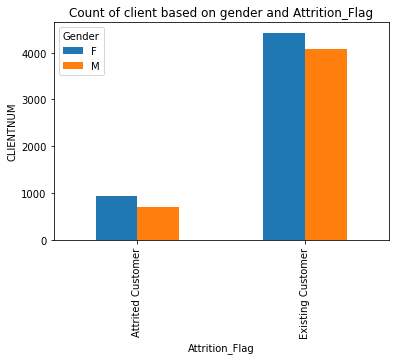

In [4]:
#Grouping the datset by gender and attrition_flag
genderdf = carddf[['CLIENTNUM','Gender','Attrition_Flag']]
groupedby_gender_attrition =genderdf.groupby(['Attrition_Flag','Gender']).count()


#This visualization shows the total count of male and female as existing customers and also the cont of the male and female
# who are attrition customers

pivot_table1 = groupedby_gender_attrition.pivot_table(index = 'Attrition_Flag',columns='Gender',values ='CLIENTNUM')
pivot_table1
pivot_table1.plot(kind='bar')
plt.xlabel("Attrition_Flag")
plt.ylabel('CLIENTNUM')
plt.title("Count of client based on gender and Attrition_Flag")
plt.show()



Text(0.5, 1.0, 'Customers existence is depending on the period of relationship with bank and least number of months inactive ')

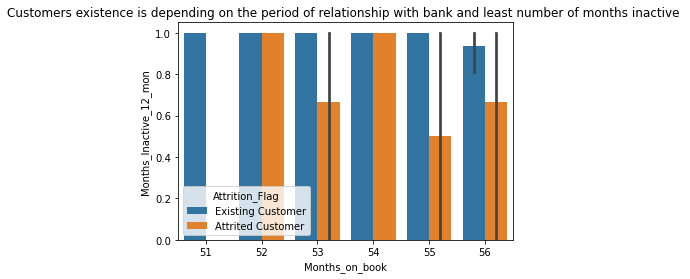

In [457]:
# Trying to find customers existence is depending on the period of relationship with bank and number of months inactive lin the last
#12 months
# Finding the customers who have period of relationship with bank is greater than 50 month & customer who are least inactive

carddf1 = carddf[(carddf['Months_on_book']>50)&(carddf['Months_Inactive_12_mon']<=1)]

#plotting the bar chart for carddf1 data frame using seaborne

sns.barplot(data=carddf1,x ='Months_on_book',y='Months_Inactive_12_mon',hue = 'Attrition_Flag')
plt.title('Customers existence is depending on the period of relationship with bank and least number of months inactive ')

<AxesSubplot:title={'center':'Count of customer grouped by card_category'}, xlabel='Card_Category'>

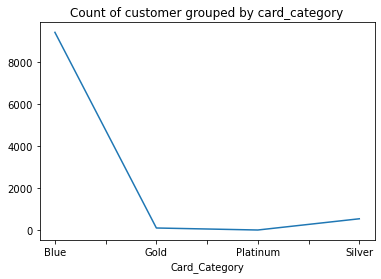

In [450]:
# Count of customers grouped by the card_category

group_card_category = carddf.groupby('Card_Category')['CLIENTNUM'].count()
group_card_category.plot(title = 'Count of customer grouped by card_category')

<AxesSubplot:title={'center':'Count of the customers grouped by Education_level'}, xlabel='Education_Level'>

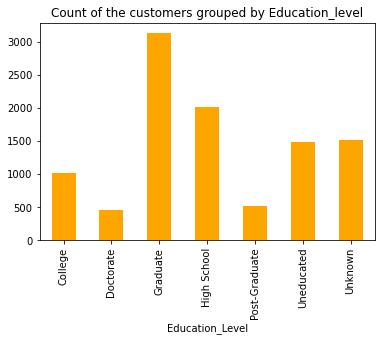

In [451]:

##count of customers grouped by Education_level

group_card_category = carddf.groupby('Education_Level')['CLIENTNUM'].count()
group_card_category.plot(kind = 'bar',color = 'orange',title ='Count of the customers grouped by Education_level')


<AxesSubplot:title={'center':'Existing  and attrition customer according to card_catergory'}, xlabel='Attrition_Flag,Card_Category'>

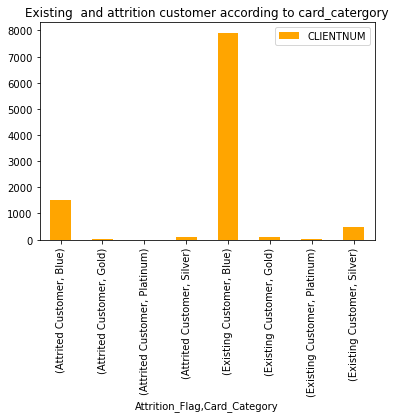

In [465]:
#Grouping the customers by card_category and Attrition_Flag

df1 = carddf[['CLIENTNUM','Attrition_Flag','Card_Category']]
df = df1.groupby(['Attrition_Flag','Card_Category']).count()
df.plot(kind = 'bar' ,title = 'Existing  and attrition customer according to card_catergory', color = 'orange')

#This visual shows that the existing customers are most likly blue card holders

In [463]:
#Creating the dataframe carddf_graduate_education ith data that satisfy the two condition
    #  To return the rows with education level == Graduate(since those customers are high in count) and
    #  Existing customers   

carddf_graduate_education = carddf[(carddf['Education_Level']=='Graduate')&(carddf['Attrition_Flag']=='Existing Customer')]

# Reducing the features in the carddf_graduate_education df with  the columns we need 

carddf_graduate_education=carddf_graduate_education[['Income_Category','Card_Category','CLIENTNUM']]
carddf_graduate_education
carddf_graduate_education_grouped = carddf_graduate_education.groupby(['Income_Category','Card_Category']).count()
carddf_graduate_education_grouped

CLIENTNUM
Income_Category Card_Category           
$120K +         Blue                 152
                Gold                   4
                Platinum               1
                Silver                15
$40K - $60K     Blue                 445
                Gold                   3
                Silver                28
$60K - $80K     Blue                 327
                Gold                   6
                Platinum               2
                Silver                35
$80K - $120K    Blue                 375
                Gold                   5
                Platinum               1
                Silver                30
Less than $40K  Blue                 887
                Gold                   9
                Silver                33
Unknown         Blue                 263
                Gold                   3
                Platinum               1
                Silver                16

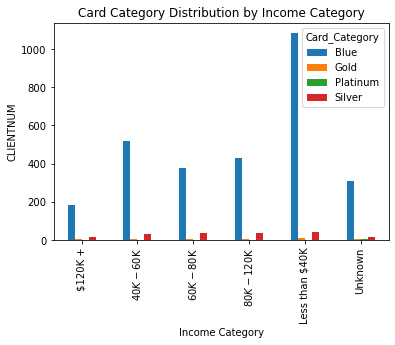

In [464]:
#Creating the dataframe carddf_graduate_education ith data that satisfy the two condition
    #  To return the rows with education level == Graduate(since those customers are high in count) and
    #  Existing customers  
carddf_graduate_education = carddf[(carddf['Education_Level']=='Graduate')&(carddf['Attrition_Flag']=='Existing Customer')]

carddf_graduate_education = carddf_graduate_education[['Income_Category','Card_Category','CLIENTNUM']]
carddf_graduate_education

#Grouping the carddf_graduate_education by 'Income_Category','Card_Category'

Grouped_Graduated_by_income_cardcategory = carddf_graduate_education.groupby(['Income_Category','Card_Category']).count()
Grouped_Graduated_by_income_cardcategory

#Creating the pivot table for the result returned by the Grouped_Graduated_by_income_cardcategory


pivot_taGrouped_Graduated_by_income_cardcategoryble = Grouped_Graduated_by_income_cardcategory.pivot_table(index="Income_Category", columns="Card_Category", values="CLIENTNUM")

# Create a stacked bar chart
pivot_table.plot(kind="bar")
plt.xlabel("Income Category")
plt.ylabel("CLIENTNUM")
plt.title("Card Category Distribution by Income Category")
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

In [ ]:
#Was there anything surprising about your dataset?

# Answer - This dataset shows a complete details of the credit card customers to find the churners.This data is completly cleaned with no null values 
# and no duplicates

In [ ]:
# Do you have any concerns about your dataset?
# Answer - Minor concerns on plot, rest the data looks good. 


In [ ]:
#Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

# Answer - This Data is completely cleaned.